In [1]:
cd ../

/Users/creator/Projects/CS6241


In [2]:
from fairrecs.preprocessor import preprocess_yow
from fairrecs.solver import Solver
from fairrecs.dp_solver import DPSolver
from fairrecs.dt_solver import DTSolver
from fairrecs.di_solver import DISolver
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns
import pandas as pd

In [3]:
movies = pd.read_csv("datasets/movies.csv", delimiter="::", names=["MovieID", "Title", "Genres"], header=None)
movies.set_index("MovieID")
movies.head()

/Users/creator/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("datasets/ratings.csv", delimiter="::", names=["UserID","MovieID","Rating","Timestamp"], header=None)
ratings.set_index("UserID")
ratings.head()

/Users/creator/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv("datasets/users.csv", delimiter="::", names=["UserID","Gender","Age","Occupation","Zip-code"], header=None)
users.set_index("UserID")
users.head()

/Users/creator/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [55]:
len(ratings)

1000209

In [57]:
users[users['UserID'] == 4169]

,UserID,Gender,Age,Occupation,Zip-code
4168,4169,M,50,0,66048


In [8]:
ratings['UserID'].value_counts()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
761       20
1493      20
5533      20
2714      20
2696      20
Name: UserID, Length: 6040, dtype: int64

In [16]:
usrrs = ratings.loc[ratings['UserID'] == 4169]

In [22]:
usrrs.set_index('MovieID', inplace=True)
movies.set_index('MovieID', inplace=True)

In [24]:
joined_urm = pd.merge(usrrs, movies, left_index=True, right_index=True, how='inner')
joined_urm.head()

,UserID,Rating,Timestamp,Title,Genres
MovieID,,,,,
3789,4169,5,965333672,"Pawnbroker, The (1965)",Drama
571,4169,4,973310265,"Wedding Gift, The (1994)",Drama
574,4169,3,975805232,Spanking the Monkey (1994),Comedy|Drama
575,4169,3,976589949,"Little Rascals, The (1994)",Children's|Comedy
577,4169,3,988324145,Andre (1994),Adventure|Children's


In [50]:
pd.set_option('display.max_rows', None)
allcomedies = joined_urm[joined_urm['Genres'].str.contains('Comedy')]
comedies = allcomedies[~allcomedies['Genres'].str.contains('Drama')]
alldramas = joined_urm[joined_urm['Genres'].str.contains('Drama')]
dramas = alldramas[~alldramas['Genres'].str.contains('Comedy')]

In [65]:
comedies['Rating'].value_counts().sort_index(axis=0)

1     16
2     93
3    175
4    149
5     82
Name: Rating, dtype: int64

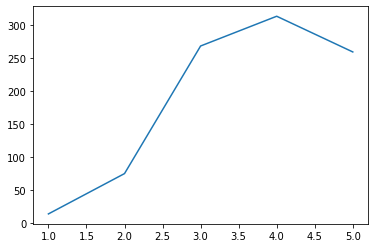

In [53]:
comedies.shape

(515, 5)

In [54]:
dramas.shape

(929, 5)

In [83]:
dramas_ratings_count = np.hstack([np.arange(1, 6).reshape(-1,1), dramas['Rating'].value_counts().sort_index(axis=0).to_numpy().reshape(-1,1)])
comedies_ratings_count = np.hstack([np.arange(1, 6).reshape(-1,1), comedies['Rating'].value_counts().sort_index(axis=0).to_numpy().reshape(-1,1)])

In [81]:
drama_avg = np.average(dramas_ratings_count[:,0], weights=dramas_ratings_count[:,1])
drama_var = np.average((dramas_ratings_count[:,0] - drama_avg)**2, weights=dramas_ratings_count[:,1])
print("Drama mean: ", drama_avg)
print("Drama var: ", drama_var)

Drama mean:  3.783638320775027
Drama var:  0.9790218541181706


In [85]:
comedy_avg = np.average(comedies_ratings_count[:,0], weights=comedies_ratings_count[:,1])
comedy_var = np.average((comedies_ratings_count[:,0] - comedy_avg)**2, weights=comedies_ratings_count[:,1])
print("Comedy mean: ", comedy_avg)
print("Comedy var: ", comedy_var)

Comedy mean:  3.3650485436893205
Comedy var:  1.0978075219153551


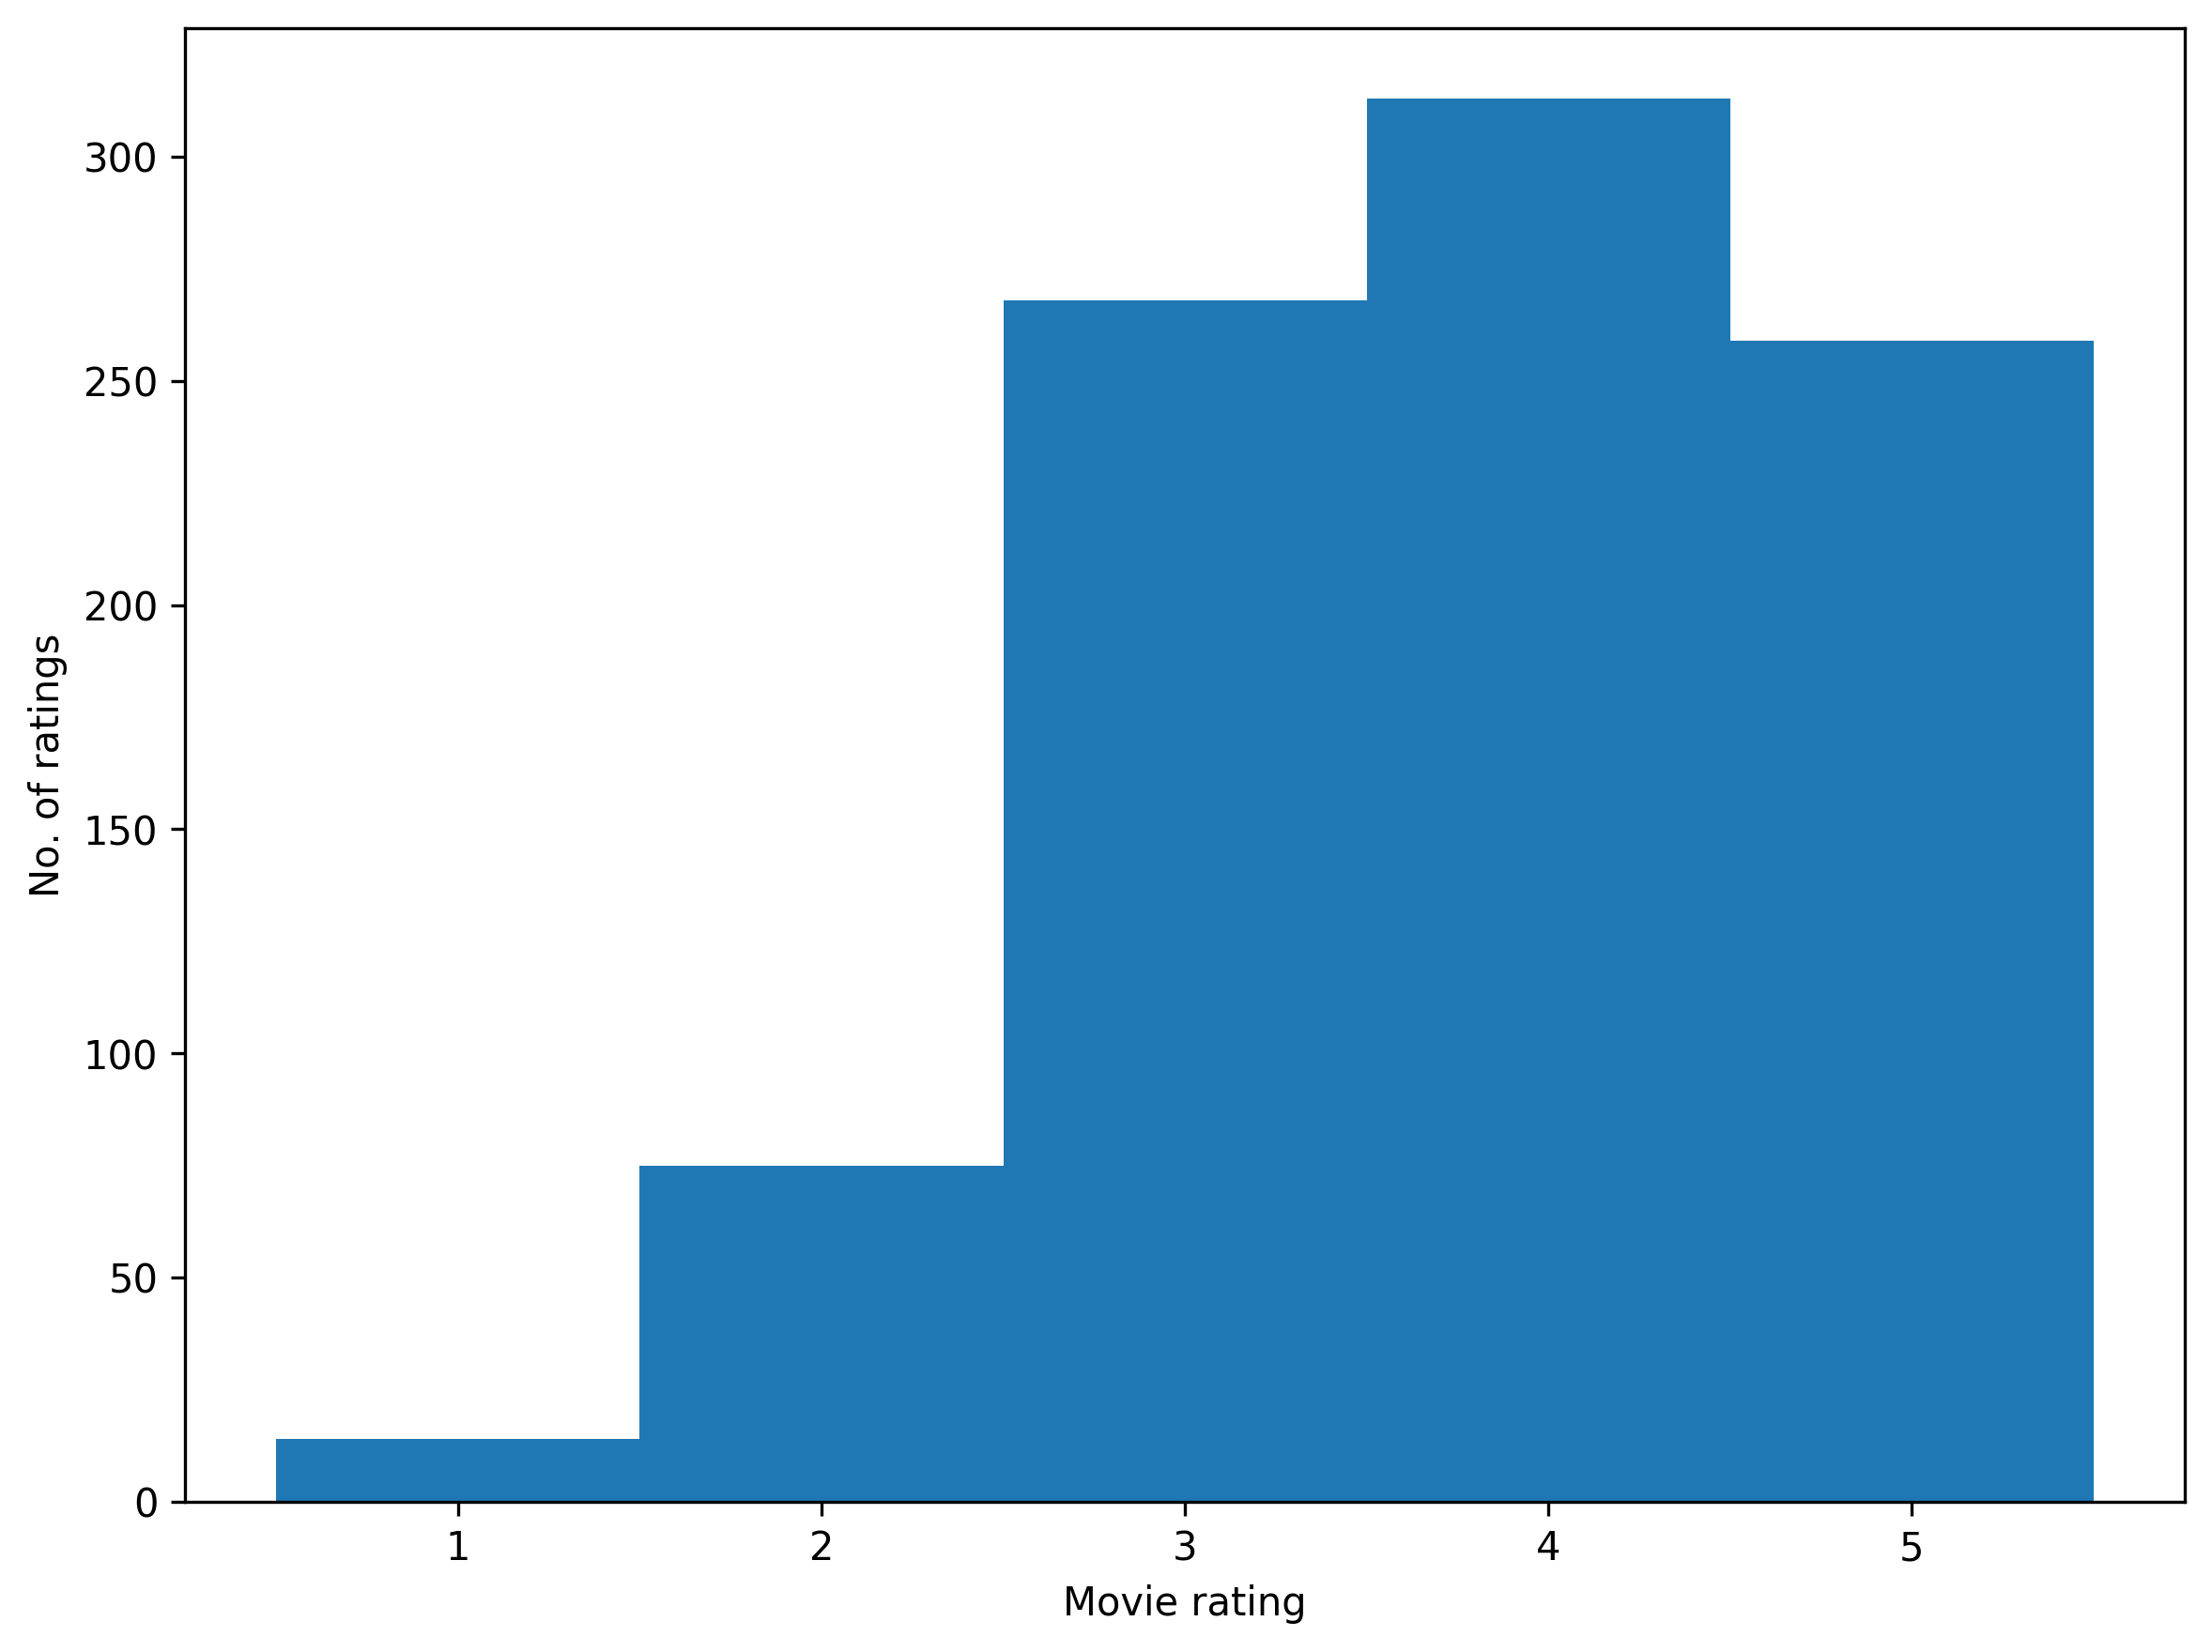

In [119]:
x = dramas_ratings_count[:,0]
y = dramas_ratings_count[:,1]
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.xlabel('Movie rating')
plt.ylabel('No. of ratings')
plt.tight_layout(True)
plt.hist(x, bins=(np.arange(1,7)-0.5), weights=y)
plt.show()

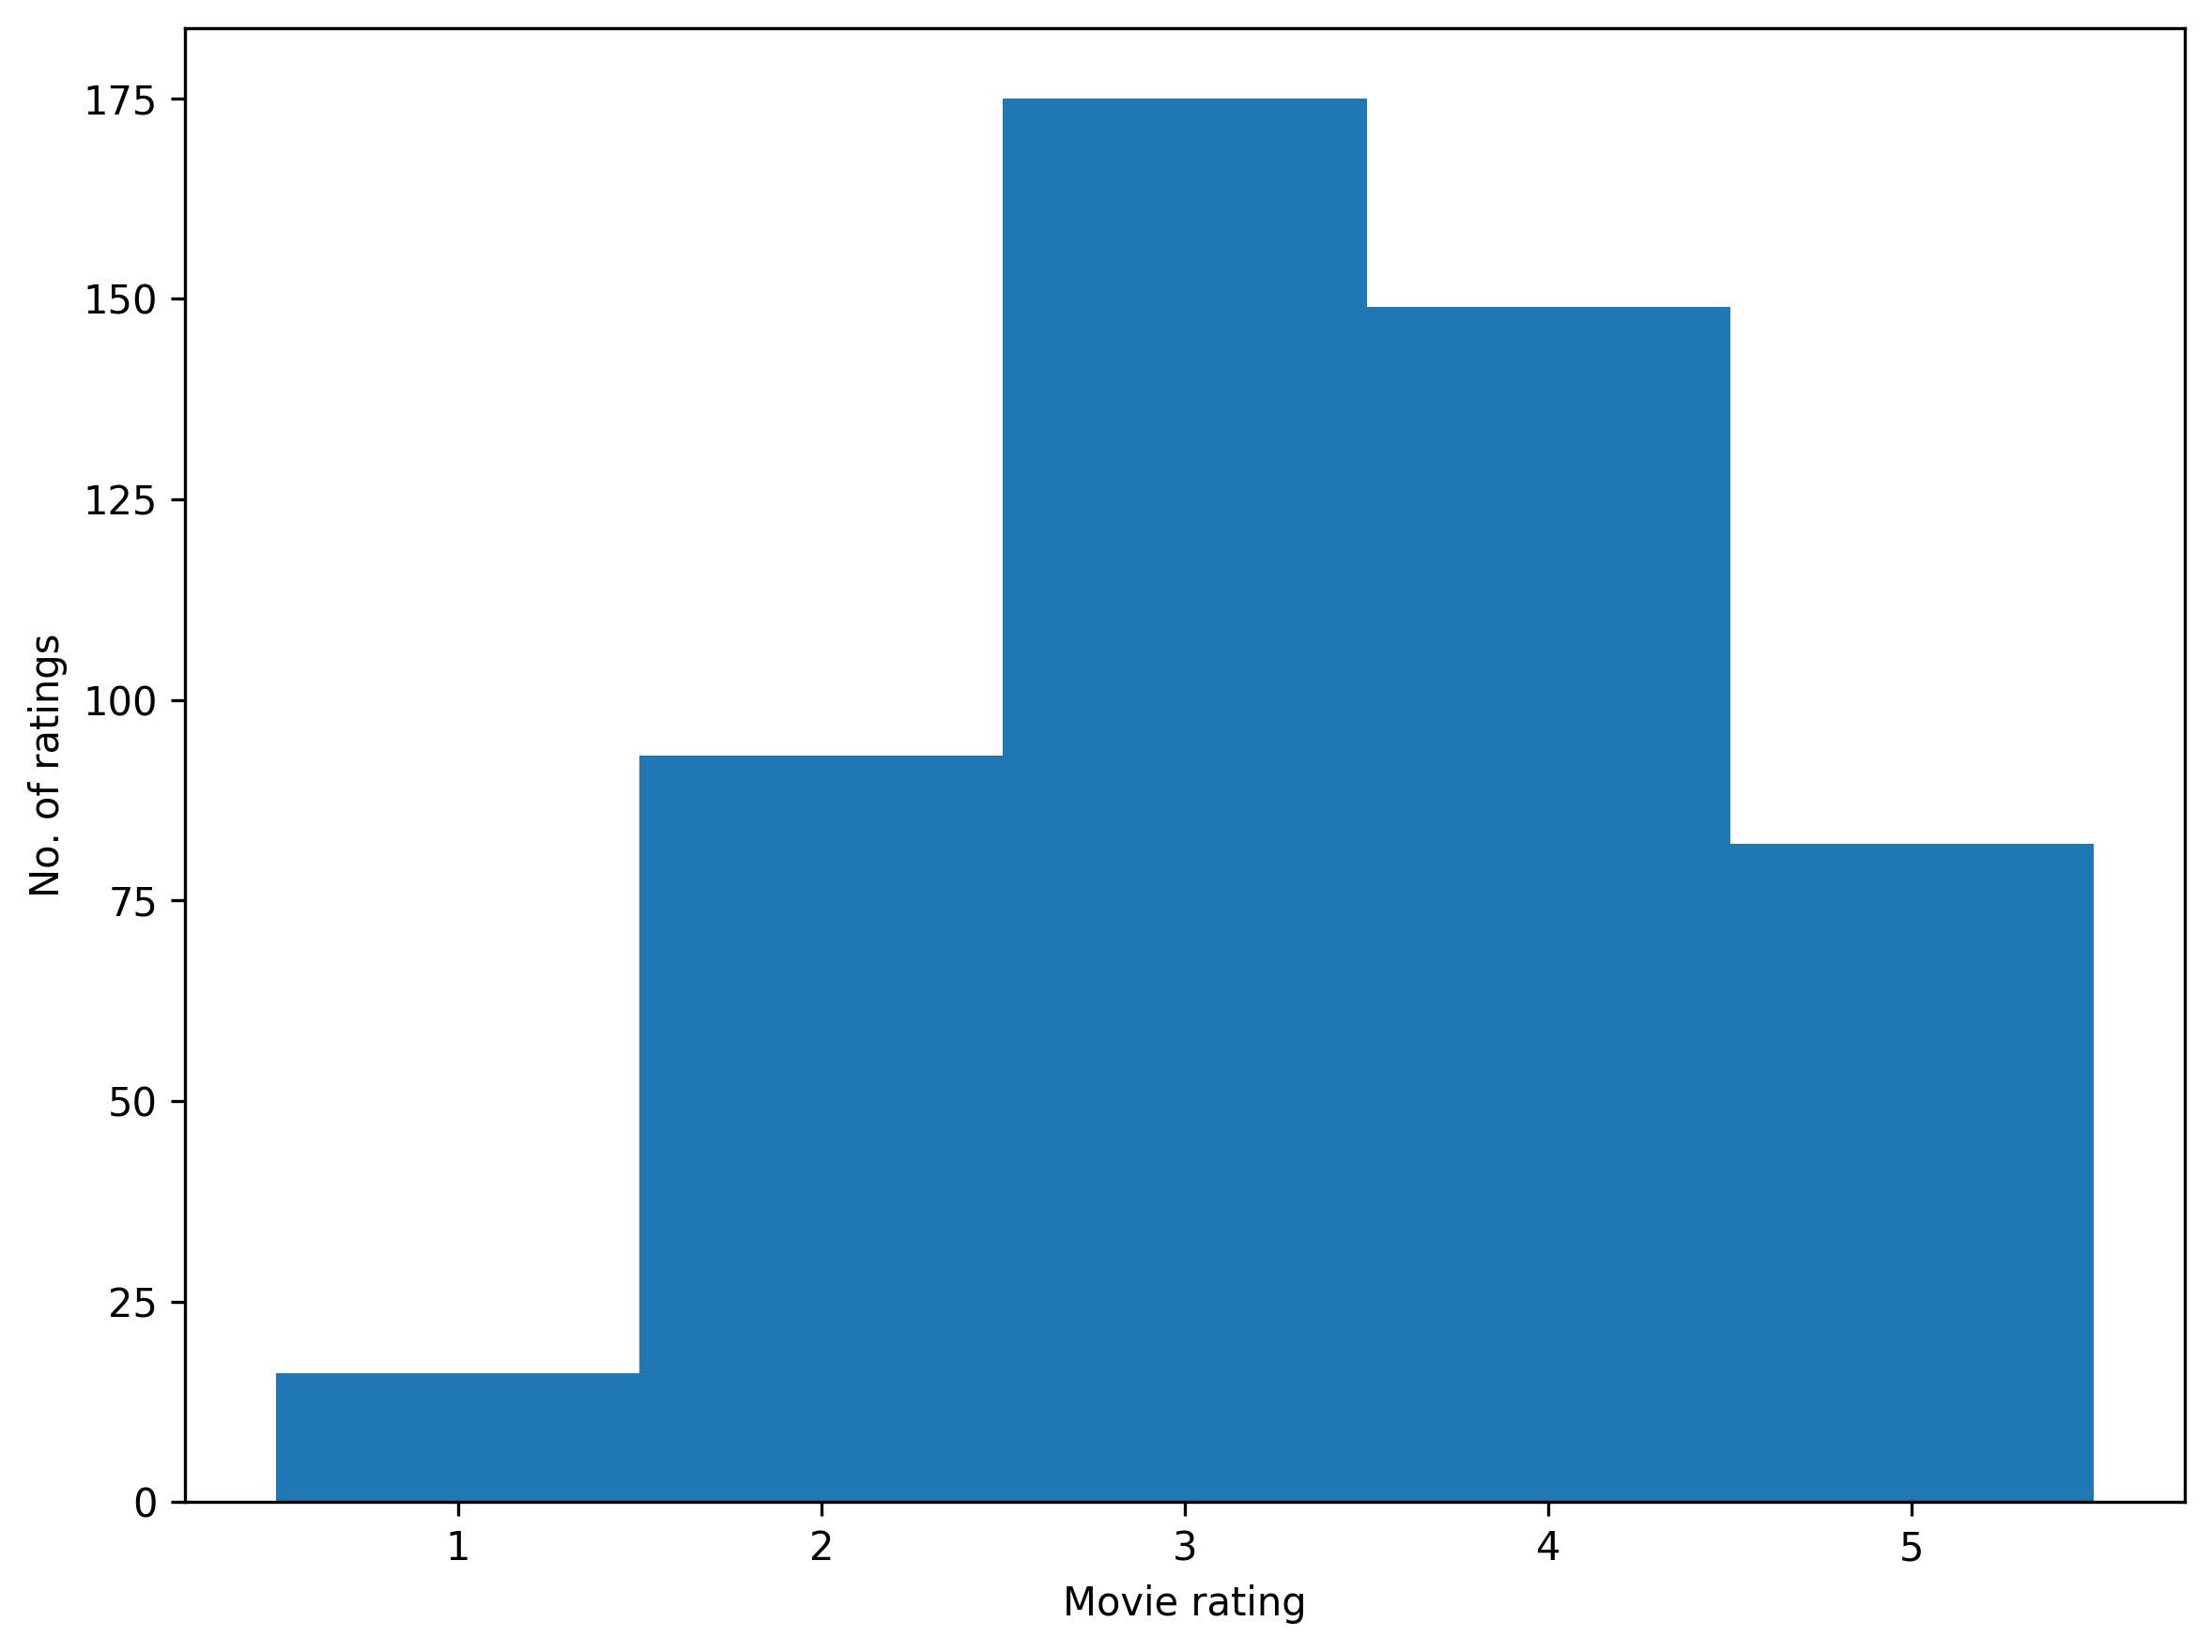

In [120]:
x = comedies_ratings_count[:,0]
y = comedies_ratings_count[:,1]
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.xlabel('Movie rating')
plt.ylabel('No. of ratings')
plt.tight_layout(True)
plt.hist(x, bins=(np.arange(1,7)-0.5), weights=y)
plt.show()